Today we begin our study of the numerical integration of functions.  We may encounter cases where we want to obtain a numerical approximation of the integral of some function *f(x)* on an interval $a \le x \le b$, $I(f) = \int_a^b f(x) dx$.  One class of numerical techniques approximates $I(f)$ as a sum of a series of a finite number of terms, each term proportional to the value of $f(x)$ somewhere on the interval, i.e. $I(f) \approx \sum_{i=0}^{i=N} \alpha_i f(x_i)$.  The $\alpha_i$ are finite coefficients.  One way to determine the coefficients approximates $f(x)$ with an interpolating function. 

Suppose we want the integral of a function $f(x)$ over the interval $a\le x\le b$.  The simplest choice of an interpolating function assumes that $f(x)$ is constant on the interval, i.e. use an interpolating function $C(x) = f(a)$.  Then, the integral is approximated by the area of the rectangle subtended by $C(x), I(f) \approx (b-a)f(a)$.  A better choice for a constant interpolant is the value of $f(x)$ at the midpoint, i.e. $C(x) = f\left(\frac{b+a}{2}\right)$.  Then, $I(f) \approx (b-a)f\left(\frac{b+a}{2}\right)$.  The *midpoint rule* is exact for linear functions $f(x) = \alpha x + \beta$.  But it's a poor approximation for higher order functions.  For example, for $f(x) = x^2, \int_0^1 f(x) dx = \frac{1}{3}$ while the midpoint approximation is $I(f) \approx (1-0)f\left(\frac{1}{2}\right) = \frac{1}{4}$.  

In [ ]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

We can improve on the midpoint rule by using a linear interpolant $C(x) = f(a) + \frac{f(b)-f(a)}{b-a}(x-a)$. The integral is then approximated by the volume of the trapezoid subtended by $C(x), I \approx (b-a)f(a) + \frac{1}{2}(b-a)*[f(b)-f(a)] = \frac{b-a}{2}\left[f(b)+f(a)\right]$.  This is known as the *trapezoid rule*.  We can improve more if we use a quadratic interpolating function, choosing $C(x)$ so that it passes through the points $(a,f(a)), (\frac{a+b}{2},f(\frac{a+b}{2})), (b,f(b))$.  The integral is then approximated by the area subtended by the parabola $C(x)=\alpha x^2+\beta x + \gamma$.  

$$
\begin{eqnarray}
f(b) &=& \alpha b^2 + \beta b + \gamma \\
f(a) &=& \alpha a^2 + \beta a + \gamma \\
f(\frac{a+b}{2}) &=& \alpha \left(\frac{a+b}{2}\right)^2 + \beta \left(\frac{a+b}{2}\right) + \gamma \\
\end{eqnarray}
$$

Evaluating (3) - [(1)+(2)]/2 and solving for $\alpha$,

$$
\begin{equation}
\alpha = \frac{4}{(b-a)^2}\left[\frac{f(b)+f(a)}{2}-f\left(\frac{b+a}{2}\right)\right]
\end{equation}
$$

Similarly, evaluating (1)-(2) and solving for $\beta$,

$$
\begin{equation}
\beta = \frac{1}{b-a}\left[f(b)-f(a)-\alpha(b^2-a^2)\right].
\end{equation}
$$

Evaluating (1)+(2) and substituting for $\alpha,\beta$,

$$
\begin{equation}
\gamma = \frac{f(b)+f(a)}{2} - \frac{\alpha}{2}\left(b^2+a^2\right) - \frac{\beta}{2}(b+a)
\end{equation}
$$

Evaluating the integral, 

$$
\int_a^b C(x) dx = \int_a^b (\alpha x^2 + \beta x + \gamma) dx = \frac{\alpha}{3}\left(b^3-a^3\right) + \frac{\beta}{2}\left(b^2-a^2\right)+\gamma\left(b-a\right)
$$.

Summing terms in $\beta$ and $\gamma$,

$$
\begin{eqnarray}
\frac{\beta}{2}(b^2-a^2)+\gamma(b-a) &=& \frac{\beta}{2}(b^2-a^2)+(b-a)\frac{f(b)+f(a)}{2} - \frac{\alpha}{2}(b^2+a^2)(b-a) - \frac{\beta}{2}(b^2-a^2) \\ 
&=& (b-a)\frac{f(b)+f(a)}{2} - \frac{\alpha}{2}\left(b^2+a^2\right)(b-a) \\
\end{eqnarray}
$$

Substituting and simplifying,

$$
\begin{eqnarray}
\frac{\alpha}{3}\left(b^3-a^3\right) + \frac{\beta}{2}\left(b^2-a^2\right)+\gamma\left(b-a\right) &=& \frac{\alpha}{3}\left(b^3-a^3\right) + (b-a)\frac{f(b)+f(a)}{2} - \frac{\alpha}{2}\left(b^2+a^2\right)(b-a) \\
&=& -\frac{\alpha}{6}(b-a)^3+(b-a)\frac{f(b)+f(a)}{2} \\
&=& -\frac{2(b-a)}{3}\left[\frac{f(b)+f(a)}{2}-f\left(\frac{b+a}{2}\right)\right]+(b-a) \frac{f(b)+f(a)}{2} \\
&=& \frac{b-a}{3}\frac{f(b)+f(a)}{2}+\frac{2(b-a)}{3}f\left(\frac{b+a}{2}\right) \\
&=& \frac{b-a}{6}\left[f(a)+4f\left(\frac{b+a}{2}\right)+f(b)\right]
\end{eqnarray}
$$

In a similar fashion, we could continue to derive higher order quadrature rules using interpolating polynomials of arbitrary degree.  This approach, known as *Newton-Coates*, suffers though from undesirable mathematical and computational behavior.  Improved estimates can be obtained with composite rules, representing the integral as a finite sum and approximating the $f(x)$ on each sub-interval with an interpolating polynomial.  Thus, the quadrature rules considered above can be expressed as

$$
\begin{eqnarray}
I(f) &\approx& \sum_{i=1}^{N} w_i f\left(\frac{x_{i-1}+x_i}{2}\right) \\
I(f) &\approx& \sum_{i=1}^{N} \frac{w_i}{2}\left[f(x_{i-1})+f(x_i)\right] \\
I(f) &\approx& \sum_{i=1}^{N} \frac{w_i}{6}\left[f(x_{i-1})+4f\left(\frac{x_{i-1}+x_i}{2}\right)+f(x_i)\right] \\
\end{eqnarray}
$$

for the midpoint, trapezoid, and Simpson's rules, respectively.  In these expressions, $w_i$ is the width of the interval $(x_{i-1},x_i)$.

**Write functions that implement the composite midpoint, trapezoid, and Simpson's rules.  Test your implementations for some simple functions.**

In [1]:
## approximate integral using midpoint rule
## the argument f is the function to be integrated
## following function the user should provide either:
##   - 3 arguments a,b,N where a = interval start, b = interval end, N is number of subintervals
##   - 1 argument x, a numpy array specifying the subintervals
def midpoint(f,*args):
    if len(args) == 3:
        x = np.linspace(args[0],args[1],args[2]+1)
    elif len(args) == 1:
        x = np.array(args[0])
    midx = 0.5*(x[:-1]+x[1:])
    widthx = x[1:]-x[:-1]
    return np.sum(widthx*f(midx))

In [2]:
## define constant, linear, and quadratic test functions
def constant(x):
    return 1

def linear(x):
    return x

def quad(x):
    return x*x+x+1

In [3]:
## evaluate midpoint for constant function on interval (0,1) --> should be exact (1.0)
print(midpoint(constant,0,1,1))
print(midpoint(constant,0,1,10))
print(midpoint(constant,0,1,100))

## evaluate midpoint for linear function on interval (0,1) --> should be exact (0.5)
print(midpoint(linear,0,1,1))
print(midpoint(linear,0,1,10))
print(midpoint(linear,0,1,100))

## evaluate midpoint for quadratic function on interval (0,1) --> only approximate (11/6 ~ 1.8333)
print(midpoint(quad,0,1,1))
print(midpoint(quad,0,1,10))
print(midpoint(quad,0,1,100))

1.0
1.0
1.0
0.5
0.5
0.5
1.75
1.8325000000000002
1.833325


In [4]:
## approximate integral using trapezoid rule
## the argument f is the function to be integrated
## following function the user should provide either:
##   - 3 arguments a,b,N where a = interval start, b = interval end, N is number of subintervals
##   - 1 argument x, a numpy array specifying the subintervals
def trapezoid(f,*args):
    if len(args) == 3:
        x = np.linspace(args[0],args[1],args[2]+1)
    elif len(args) == 1:
        x = np.array(args[0])
    widthx = x[1:]-x[:-1]
    return np.sum(0.5*widthx*(f(x[:-1])+f(x[1:])))

In [5]:
## evaluate trapezoid for constant function on interval (0,1) --> should be exact (1.0)
print(trapezoid(constant,0,1,1))
print(trapezoid(constant,0,1,10))
print(trapezoid(constant,0,1,100))

## evaluate trapezoid for linear function on interval (0,1) --> should be exact (0.5)
print(trapezoid(linear,0,1,1))
print(trapezoid(linear,0,1,10))
print(trapezoid(linear,0,1,100))

## evaluate trapezoid for quadratic function on interval (0,1) --> only approximate (11/6 ~ 1.8333)
print(trapezoid(quad,0,1,1))
print(trapezoid(quad,0,1,10))
print(trapezoid(quad,0,1,100))

1.0
1.0
1.0
0.5
0.5
0.5
2.0
1.835
1.83335


In [6]:
## approximate integral using Simpson's rule
## the argument f is the function to be integrated
## following function the user should provide either:
##   - 3 arguments a,b,N where a = interval start, b = interval end, N is number of subintervals
##   - 1 argument x, a numpy array specifying the subintervals
def simpson(f,*args):
    if len(args) == 3:
        x = np.linspace(args[0],args[1],args[2]+1)
    elif len(args) == 1:
        x = np.array(args[0])
    midx = 0.5*(x[:-1]+x[1:])
    widthx = x[1:]-x[:-1]
    return np.sum((widthx/6.)*(f(x[:-1])+4*f(midx)+f(x[1:])))

In [7]:
## evaluate simpson for constant function on interval (0,1) --> should be exact (1.0)
print(simpson(constant,0,1,1))
print(simpson(constant,0,1,10))
print(simpson(constant,0,1,100))

## evaluate simpson for linear function on interval (0,1) --> should be exact (0.5)
print(simpson(linear,0,1,1))
print(simpson(linear,0,1,10))
print(simpson(linear,0,1,100))

## evaluate simpson for quadratic function on interval (0,1) --> should be exact (11/6 ~ 1.833)
print(simpson(quad,0,1,1))
print(simpson(quad,0,1,10))
print(simpson(quad,0,1,100))

1.0
1.0
1.0
0.5
0.5
0.49999999999999994
1.8333333333333333
1.8333333333333333
1.8333333333333333


Ok, these seem to work for simple cases.  Let's look at a more complex function and try to evaluate the error function, $\textrm{erf}(z) = \frac{2}{\sqrt{\pi}}\int_0^z e^{-t^2} dt$.

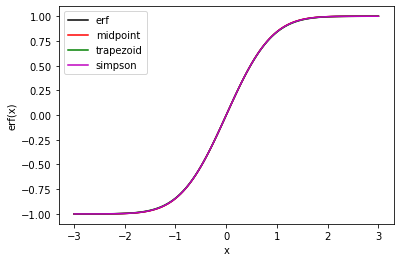

In [17]:
from scipy.special import erf

def myerf(x):
    return (2/np.sqrt(np.pi))*np.exp(-x*x)

xvals = np.linspace(-3,3,121)
erfm,erft,erfs,erfint = [],[],[],[]
N = 10
for x in xvals:
    erfm.append(midpoint(myerf,0,x,5))
    erft.append(trapezoid(myerf,0,x,5))
    erfs.append(simpson(myerf,0,x,5))

fig,ax = plt.subplots(1,1)
ax.plot(xvals,erf(xvals),'k',label='erf')
ax.plot(xvals,erfm,'r',label='midpoint')
ax.plot(xvals,erft,'g',label='trapezoid')
ax.plot(xvals,erfs,'m',label='simpson')
#ax.plot(xvals,erfint,'b',label='quad')
ax.set_xlabel('x')
ax.set_ylabel('erf(x)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels)

Just looking at the plot above we might conclude that the approximation methods closely reproduce the *true* value.  It would be useful to quantify this behavior as a way to understand the performance of the different approximations.  One simple metric is the absolute error, $\epsilon_{\textrm{abs}} = |I-I_h|$, where $I_h$ is the approximated value of the integral assuming uniform subintervals of width $h$.  For the error function we get:

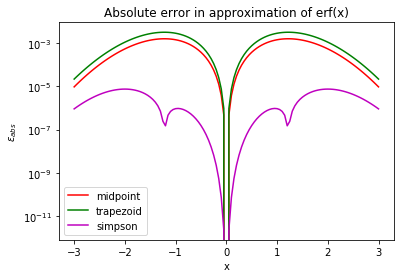

In [22]:
fix,ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('$\epsilon_{abs}$')
ax.set_title('Absolute error in approximation of erf(x)')
ratm = np.abs(erf(xvals)-erfm)
ax.plot(xvals,ratm,'r',label='midpoint')
ratt = np.abs(erf(xvals)-erft)
ax.plot(xvals,ratt,'g',label='trapezoid')
rats = np.abs(erf(xvals)-erfs)
ax.plot(xvals,rats,'m',label='simpson')
handles1, labels1 = ax.get_legend_handles_labels()
ax.legend(handles1,labels1)
ax.set_yscale('log')

It appears that the error in the midpoint and trapezoid approximations is similar, while it is smaller for the Simpson method.  This result perhaps shouldn't be surprising, as the first two are based on linear interpolating functions while the Simpson method was obtained with a quadratic interpolating polynomial.  This behavior is described by the *polynomial interpolation theorem*.  It can be understood considering the function as a Taylor series expansion, which we state here without proof:

Let $f(x)$ be a function with $n+1$ continuous derivatives on an interval containing $n+1$ distinct points $x_0 < x_1 < \ldots < x_n$.  If $p(x)$ is the unique polynomial of degree $n$ or less such that $p(x_i) = f(x_i)$, then for any value of $x$ in the interval $[x_0,x_n]$,

$$
f(x) - p(x) = \frac{\left(x-x_0\right)\left(x-x_1\right)\cdots\left(x_n\right)}{\left(n+1\right)!}f^{\left(n+1\right)}(x),
$$

where $f^{\left(n+1\right)}$ is the $(n+1)^{\textrm{th}}$ derivative of $f$.

Consider the integral $I = \int_{-1}^{1} e^{x} dx = e - (1/e)$.  This integrand is a polynomial of infinite order.  Do you expect the methods above to approximate well this integral (and why)? Let's evaluate the integral for 5 subintervals and calculate the absolute error.

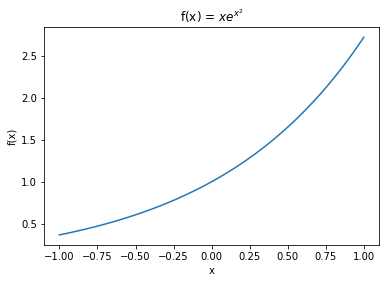

In [86]:
def testfunc(x):
    return np.exp(x)

xvals=np.linspace(-1,1,201)
fig,ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('f(x) = $xe^{x^2}$')
ax.plot(xvals,testfunc(xvals))

In [91]:
print('midpoint: ',midpoint(testfunc,-1,1,5))
print('trapezoid: ', trapezoid(testfunc,-1,1,5))
print('simpson: ', simpson(testfunc,-1,1,5))

midpoint:  2.3348058545146397
trapezoid:  2.3816578330151725
simpson:  2.3504231806814837


Let's apply the above theorem for the trapezoid rule. Here, the interpolating polynomial on each subinterval is a linear function, so the error in this approximation in the $i^{\textrm{th}}$ subinterval is given by

$$
\begin{eqnarray}
|I-I_h|_i &=& |\int_{x_{i-1}}^{x_i} \frac{\left(x-x_{i-1}\right)\left(x-x_i\right)}{2}f^{(2)}(z) dx| \\
&=& \frac{\left(x_i-x_{i-1}\right)^3}{12}f^{(2)}(z) \\
&=& \frac{h^3}{12}f^{(2)}(z).
\end{eqnarray}
$$

Summing the error in each of the $n$ (uniform) subintervals, substituting for $f^{(2)}(z)$ the maximum value of $f^{(2)}$ on $[x_0,x_n]$, and using the relation $nh = (x_n-x_0)$, we obtain

$$
|I-I_h| \le \frac{M_2}{12}(x_n-x_0)h^2.
$$

Can you find an expression for the bound on the error in the midpoint and Simpson's method?

In [92]:
terrabs = np.max(np.abs(testfunc(np.linspace(-1,1,2001))))*0.4*0.4/6.
print('Bound on absolute error using trapezoid rule: ', terrabs)

Bound on absolute error using trapezoid rule:  0.07248751542557455


The methods appear to approximate the integral with only a few subintervals.  How qiuckly a numerical algorithm converges to the true answer, a concept called *convergence*, is critical in numerical analysis. To attempt to quantify this concept, we need a measure how closely the approximation is to the true value.  One measure we can use is the absolute error defined above.  Let's evaluate $I = \int_{-1}^{1} e^{x} dx$ using the three methods for different number (or size) subintervals.

In [96]:
nsubs = np.array([20,200,2000])
xvals = np.array([np.linspace(-1,1,x) for x in nsubs])
hvals = 2./(nsubs-1)
mvals = np.array([midpoint(testfunc,x) for x in xvals])
tvals = np.array([trapezoid(testfunc,x) for x in xvals])
svals = np.array([simpson(testfunc,x) for x in xvals])

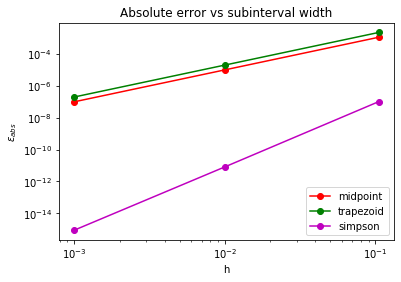

In [98]:
import math
true_val = math.e - (1./math.e)
fix,ax = plt.subplots()
ax.set_xlabel('h')
ax.set_ylabel('$\epsilon_{abs}$')
ax.set_title('Absolute error vs subinterval width')
ax.plot(hvals,np.abs(mvals-true_val),'or-',label='midpoint')
ax.plot(hvals,np.abs(tvals-true_val),'og-',label='trapezoid')
ax.plot(hvals,np.abs(svals-true_val),'om-',label='simpson')
handles2, labels2 = ax.get_legend_handles_labels()
ax.legend(handles2,labels2,loc='lower right')
ax.set_yscale('log')
ax.set_xscale('log')

It appears that the error decreases with decreasing $h$.  On a log-log plot, the slope is 2 for the midpoint and trapezoid methods, suggesting that the error in the midpoint method is also quadratic in the width of the sub-interval.  What is the slope of the line corresponding to the error in Simpson's method?  You should try to reconcile the numerical results above with the theoretical error bound obtained applying the polynomial interpolation theorem for the different quadratures.

From the above, we may want to conclude that we can obtain an arbitrarily good approximation of the integral $I$ by continuing to decrease $h$.  However, our discussion above only addressed the *discretization* or *approximation* error resulting from the numerical approximation, i.e. from the approximation of $f(x)$ by an interpolating function on each subinterval.  There is another type of error we must remain cognizant of.  *Roundoff error* arises due to the finite precision of the representation of numbers in binary by the computer.  The importance of roundoff error depends on the precision with which we represent numbers.  Thus, for example, single precision floating point numbers are uncertain at the level of $10^{-8}$.  Similarly, double and quadruple precision numbers are accurate to $10^{-16}$ and $10^{-32}$, respectively.  

The approximation error goes to 0 as $h\rightarrow0$.  However, as $h$ decreases, the number of function evaluations and sums in the terms increases inversely.  Let's explore this by repeating the exercise above for a broader range of values of $h$.

In [115]:
nsubs = 2*np.array(np.power(10,np.arange(1,9)),dtype=np.int)
xvals = np.array([np.linspace(-1,1,x) for x in nsubs])
hvals = 2./(nsubs-1)
mvals = np.array([midpoint(testfunc,x) for x in xvals])
tvals = np.array([trapezoid(testfunc,x) for x in xvals])
svals = np.array([simpson(testfunc,x) for x in xvals])

[-1.08478440e-03 -9.89198700e-06 -9.80314367e-08 -9.79432091e-10
 -9.79305526e-12 -9.76996262e-14 -3.55271368e-15 -8.88178420e-16]
[ 2.16986930e-03  1.97839990e-05  1.96062877e-07  1.95886463e-09
  1.95874428e-11  1.96287431e-13 -4.44089210e-16 -8.88178420e-16]
[ 1.00164104e-07  8.32622860e-12  8.88178420e-16  0.00000000e+00
  4.44089210e-16  0.00000000e+00 -2.66453526e-15 -8.88178420e-16]


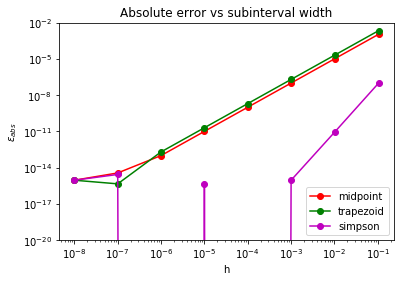

In [119]:
import math
true_val = math.e - (1./math.e)
print(mvals-true_val)
print(tvals-true_val)
print(svals-true_val)
fix,ax = plt.subplots()
ax.set_xlabel('h')
ax.set_ylabel('$\epsilon_{abs}$')
ax.set_title('Absolute error vs subinterval width')
ax.plot(hvals,np.abs(mvals-true_val),'or-',label='midpoint')
ax.plot(hvals,np.abs(tvals-true_val),'og-',label='trapezoid')
ax.plot(hvals,np.abs(svals-true_val),'om-',label='simpson')
handles3, labels3 = ax.get_legend_handles_labels()
ax.legend(handles3,labels3,loc='lower right')
ax.set_ylim(10**-20,10**-2)
ax.set_yscale('log')
ax.set_xscale('log')